<h1>Iris Flower Species Classification With KNN </h1>

## Table Of Content

1. [Introduction](#1)
    * 1.1 [Examining The Project Topic](#2)
    * 1.2 [Recorgnizing Variables in The Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The DataSet](#7)
    * 2.3 [Initial Analysis On The Dataset](#8)
        * 2.3.1 [Output(1)](#9)
3. [Preparation For Exploratory Data Analysis(EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examing Unique Values](#12)
        * 3.2.1 [Analysis Output(2)](#13)
    * 3.3 [Separating Varaibles(Numeric or Categorical)](#14)
    * 3.4 [Examining Statistics or Variales](#15)
        * 3.4.1 [Output Analysis(3)](#16)
4. [Exploratory Data Analysis(EDA)](#17)

### 1. Introduction<a id=1></a>

#### 1.1 Examining The Project Topic<a id =2></a>

### What is Iris Flower?
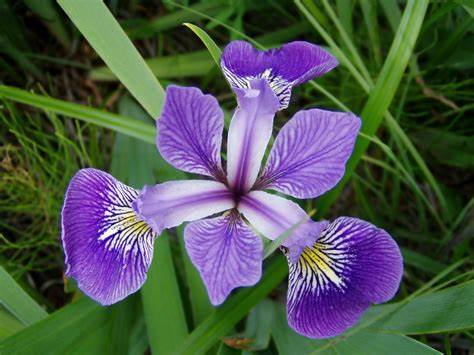

* The Iris dataset is a popular dataset in machine learning and statistics, often used for classification tasks. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The Use of Multiple Measurements in Taxonomic Problems."

### Species Of Iris Flower

The Iris flower consists of the following species;
* Setosa, 
* Versicolor, and 
* Virginica.

### About Iris Dataset
* The Iris dataset contains measurements of various characteristics of three species of iris flowers: 
* Setosa, 
* Versicolor, and 
* Virginica. 
* These characteristics include the lengths and widths of the sepals and petals. The dataset consists of 150 samples, with 50 samples for each species.

### Attributes

Here are the attributes typically included in the Iris dataset:

1. Sepal length (in centimeters)
2. Sepal width (in centimeters)
3. Petal length (in centimeters)
4. Petal width (in centimeters)
5. Species (Setosa, Versicolor, or Virginica)


#### What is the Goal of The Dataset?

* The goal of using the Iris dataset in machine learning is often to train a model to classify iris flowers into one of the three species based on their measurements. 
* It's a classic example of a supervised learning problem, where the species labels serve as the target variable, and the measurements serve as the features used to make predictions.

#### 1.2 Recorgnizing Variables in The Dataset <a id =3></a>

1. <b>Id:</b> Represents the indexes of each of the observation values in the dataset.
1. <b>SepalLength</b> : This variable represents the length of the sepals (the outermost whorl of a flower) of the iris in centimeters. Sepals are the green, leaf-like structures that enclose and protect the flower bud.

2. <b>SepalWidth:</b> This variable represents the width of the sepals of the iris in centimeters. It's measured perpendicular to the length and also in centimeters.

3. <b>PetalLength:</b> Petal length refers to the length of the petals (the innermost whorl of a flower) of the iris in centimeters. Petals are usually the colorful parts of the flower that attract pollinators.

4. <b>PetalWidth:</b> Petal width represents the width of the petals of the iris in centimeters. Similar to sepal width, it's measured perpendicular to the length and also in centimeters.

5.<b>Species:</b> This variable indicates the species of the iris flower. In the Iris dataset, there are three possible species: Setosa, Versicolor, and Virginica. Each sample in the dataset is labeled with one of these species.

* Here's a summary of the variables:

<b>- SepalLength (cm)</b><p>
<b>- SepalWidth (cm)</b><p>
<b>- PetalLength (cm)</b><p>
<b>- PetalWidth (cm)</b><p>
<b>- Species</b> (Iris-Setosa, Iris-Versicolor, Iris-Virginica).


### 2. First Organization<a id=4></a>
#### 2.1 Required Python Libraries<a id=5></a>
#### 2.1.1 Basic Libraries<a id=6></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/iris-csv/Iris.csv


### 2.2 Loading The DataSet<a id = 7></a>

In [2]:
df = pd.read_csv("/kaggle/input/iris-csv/Iris.csv")

In [3]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

### 2.3 Initial Analysis On The Dataset<a id=8></a>

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Finding the shape of the dataframe
print("Shape of dataset:",df.shape)

Shape of dataset: (150, 6)


In [6]:
# Getting to read some relevant info of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.value_counts().sum()

150

In [9]:
# The indexes of the observation values are given, there's no need to keep the 'id' variable.
df.drop(["Id"],axis= 1, inplace =True)

In [10]:
# Since the species variable are from Iris, im going to replace the Iris-
df["Species"] = df["Species"].str.replace("Iris-","")

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.3.1 Output(1)<a id= 9></a>

* There's no Missing values in the observational variables above.
* The Dataset consists of 150 rows and 6 cloumns.
* There's no missing values in the dataset from the first analysis.
* There are numerical data types in the dataset(integer and float) and also an <b>object</b> type.

### 3. Preparation For Exploratory Data Analysis(EDA)<a id=10></a>

### 3.1 Examining Missing Values<a id=11></a>

In [12]:
# Creating a loop to find the missing values in the variables.
isnull_numb = []
for i in df.columns:
    variables = df[i].isnull().sum()
    isnull_numb.append(variables)
pd.DataFrame(isnull_numb,index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


<Axes: >

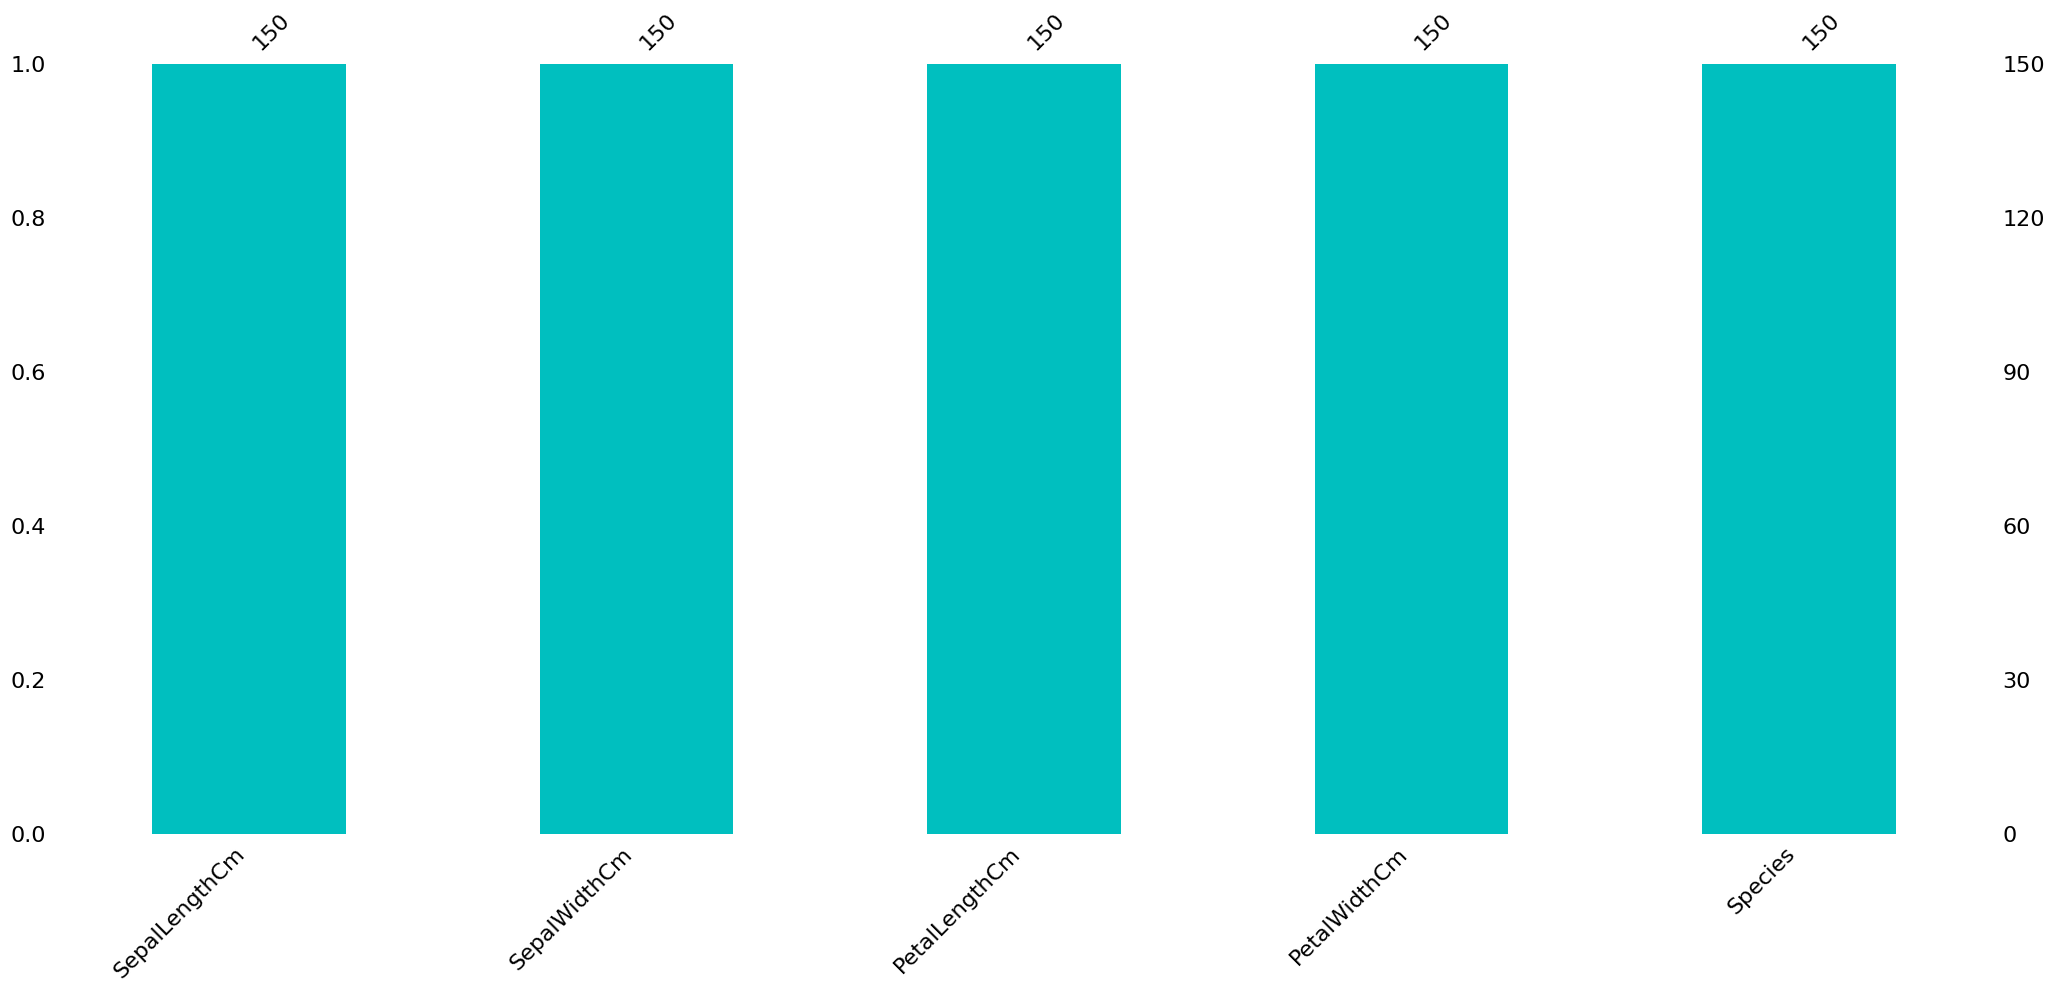

In [13]:
# now Lets visualize the missing data
import missingno
missingno.bar(df, color ="c")

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df["SepalLengthCm"].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [16]:
df["SepalWidthCm"].value_counts().sum()

150

### Examining Unique values<a id = 12></a>

In [17]:
# Lets loop throught the dataset to find and create a dataframe for the unique values of the variables.
unique_numb = []
for i in df.columns:
    x = df[i].isnull().sum()
    unique_numb.append(x)
pd.DataFrame(unique_numb, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### 3.2.1 Analysis Output(2)<a id=13></a>

* In this context, we visualize the graph of the missing values of the variables using the missingno function.

### 3.3 [Separating Varaibles(Numeric or Categorical)<a id=14></a>

* From out table, only our target variable "Species is categorical.

* Since we dont have alot of categorical variables, we are going to iqnore the process of manipulating categorical data.

In [18]:
# Creating a numeric variable
numeric_var = df.drop(["Species"],axis =1)

In [19]:
numeric_var

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


* Now lets visualize our numeric variable with dispot

### 3.4 Examining Statistics or Variales<a id=15></a>

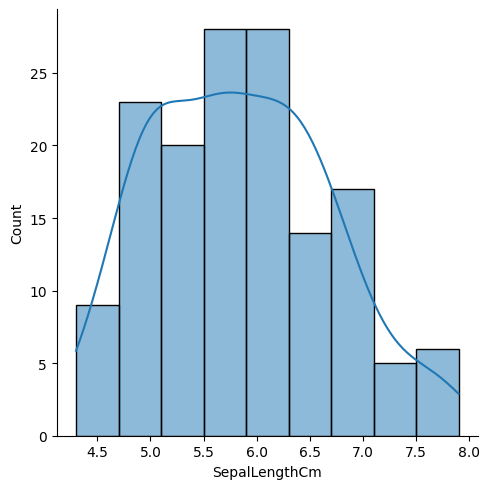

In [20]:
sns.displot(df["SepalLengthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

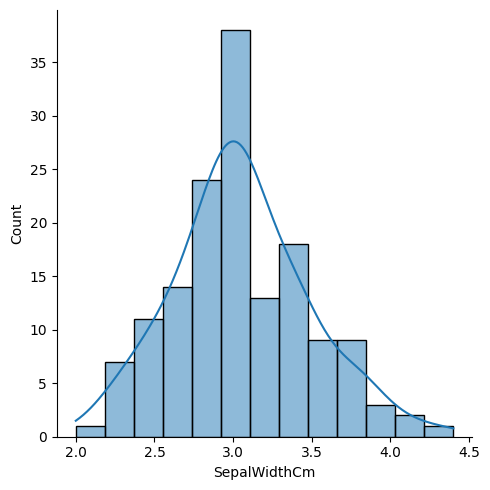

In [21]:
sns.displot(df["SepalWidthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

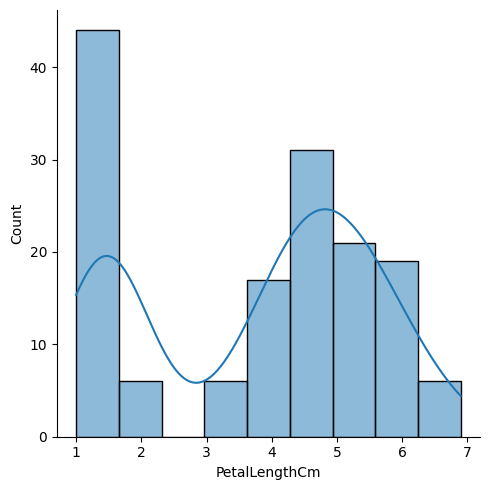

In [22]:
sns.displot(df["PetalLengthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

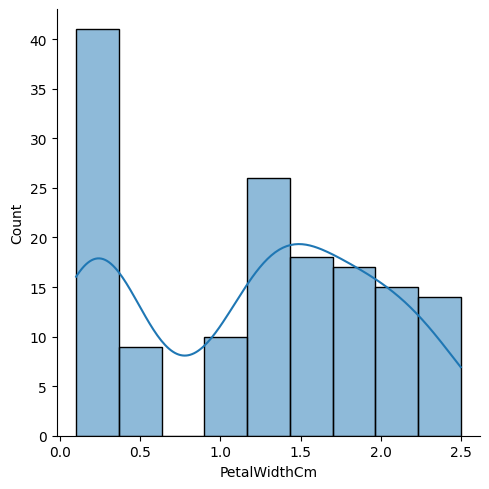

In [23]:
sns.displot(df["PetalWidthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

### 3.4.1 Output Analysis(3)<a id=16></a>

* From the above analysis, we observed that some of the variables got some outliers.
* The sepals characteristics are also symmetric.
* In the next chapter we will perform EDA.